Here we test the FDFD code we wrote.

In [1]:
## Imports

In [2]:
import scipy.constants as sc
from scipy.sparse import spdiags
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [4]:
π = np.pi
c0 = sc.c
λ = 1.e-6
ω = 2*π*c0/λ

In [5]:
## Create the structure

In [6]:
import fdfd

In [7]:
from fdfd import geometry
from fdfd.geometry.twodim.circle import Circle

In [8]:
from scipy.sparse import csc_matrix, block_diag, bmat, diags

# Circle

In [14]:
cir = Circle(x0=0, y0=0, eps_back=1.0, eps_circ=12.0, radius=0.5e-6)

In [15]:
Nx = Ny = 200
Nz = 1
cir.make(Nx,Ny)

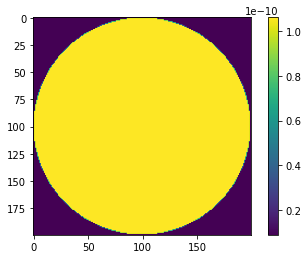

In [16]:
# cir.smoothen(Nx,Ny)
plt.imshow(cir.eps)
plt.colorbar()

In [17]:
## Get fields

In [18]:
Δx = Δy = np.unique(np.diff(cir.X))[0]

In [19]:
from fdfd.solve import maxwell

In [20]:
Ce = maxwell.Ce(Nx, Ny, 1, Δx, Δy, Δz=1)
Ch = maxwell.Ch(Nx, Ny, 1, Δx, Δy, Δz=1)

In [21]:
# Ce = csc_matrix(Ce)
# Ch = csc_matrix(Ch)

In [22]:
ϵ = np.ravel(cir.eps)
Tϵx = spdiags(ϵ, 0, ϵ.shape[0], ϵ.shape[0], format = 'csr')
Tϵy = spdiags(ϵ, 0, ϵ.shape[0], ϵ.shape[0], format = 'csr')
Tϵz = spdiags(ϵ, 0, ϵ.shape[0], ϵ.shape[0], format = 'csr')

In [23]:
Tϵ = block_diag((Tϵx, Tϵy, Tϵz))

In [24]:
μ = np.hstack((np.ravel(cir.mu), np.ravel(cir.mu), np.ravel(cir.mu)))
Tμ = spdiags(μ, 0, μ.shape[0], μ.shape[0], format = 'csr')

In [25]:
from scipy.sparse import csr_matrix

In [22]:
jz = np.zeros((Nx,Ny))
jz[Nx//2,Ny//2] = 10
jx = jy = np.zeros((Nx,Ny))
j = np.vstack((jx,jy,jz))
J = csr_matrix(j.flatten()).T

In [23]:
mx = my = mz = np.zeros((Nx,Ny))
m = np.vstack((mx,my,mz))
M = csr_matrix(m.flatten()).T

In [24]:
solvedE = maxwell.solveE(Ce, Ch, ω, Tϵ, Tμ, J, M)

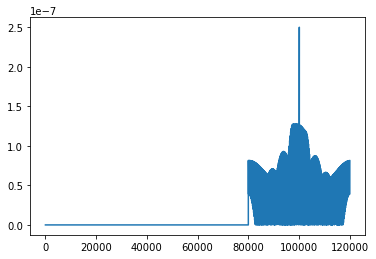

In [25]:
plt.plot(np.abs(solvedE))

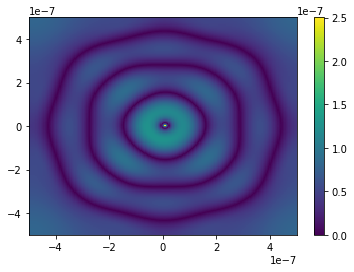

In [26]:
plt.pcolormesh(cir.X, cir.Y, np.reshape(np.abs(solvedE[-(Nx*Ny+1):-1]), (Nx, Ny)))
plt.colorbar()

# eigensolver

In [27]:
from fdfd.solve.eigensolver import eigenmode

In [28]:
eigs = eigenmode.solveE(10, Ce, Ch, ω, Tϵ, Tμ)

KeyboardInterrupt: 

In [ ]:
eigs

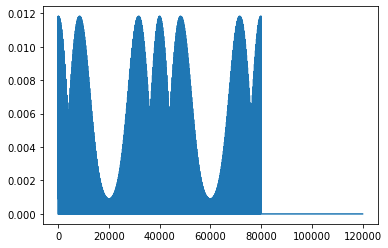

In [127]:
k = 3
plt.plot(np.abs(eigs[1].T[k]))

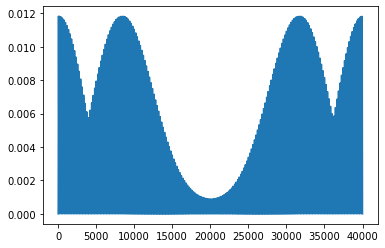

In [128]:
plt.plot(np.abs(eigs[1].T[k][0:(Nx*Ny+1)]))

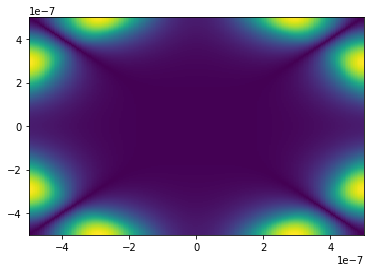

In [129]:
plt.pcolormesh(cir.X, cir.Y, np.reshape(np.abs(eigs[1].T[k][0:(Nx*Ny)]), (Nx, Ny)))

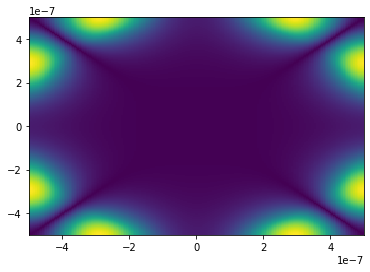

In [130]:
plt.pcolormesh(cir.X, cir.Y, np.reshape(np.abs(eigs[1].T[k][Nx*Ny:2*(Nx*Ny)]), (Nx, Ny)))

Another approach

In [175]:
invTμ = diags(1./Tμ.diagonal())
invTϵ = diags(1./Tϵ.diagonal())
O = invTϵ * Ch * invTμ * Ce

In [177]:
k_eigs = 5

In [178]:
eigg = eigs(O, k_eigs)

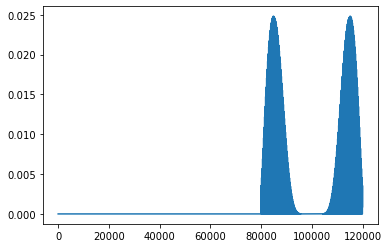

In [185]:
plt.plot(np.abs(eigg[1].T[3]))

# other tests

Now let us only change by making the circle smaller, on the order of the wavelength...

In [25]:
cir2 = Circle(x0=0, y0=0, eps_back=1.0, eps_circ=4.0, radius=1.0e-6)
cir2.make(Nx,Ny)
Δx = Δy = np.unique(np.diff(cir2.X))[0]
Ce = maxwell.Ce(Nx, Ny, 1, Δx, Δy, Δz=1)
Ch = maxwell.Ch(Nx, Ny, 1, Δx, Δy, Δz=1)
ϵ = np.hstack((np.ravel(cir2.eps), np.ravel(cir2.eps), np.ravel(cir2.eps)))
Tϵ = spdiags(ϵ, 0, ϵ.shape[0], ϵ.shape[0], format = 'csr')
μ = np.hstack((np.ravel(cir2.mu), np.ravel(cir2.mu), np.ravel(cir2.mu)))
Tμ = spdiags(μ, 0, μ.shape[0], μ.shape[0], format = 'csr')
solvedE = maxwell.solveE(Ce, Ch, ω, Tϵ, Tμ, j, m)

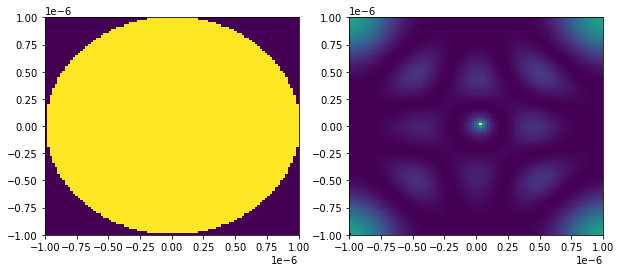

In [26]:
fig, axs = plt.subplots(1,2, figsize=(10,4))
axs[0].pcolormesh(cir2.X, cir2.Y, cir2.eps)
axs[1].pcolormesh(cir2.X, cir2.Y, np.reshape(np.abs(solvedE[-10001:-1])**2, (Nx, Ny)))

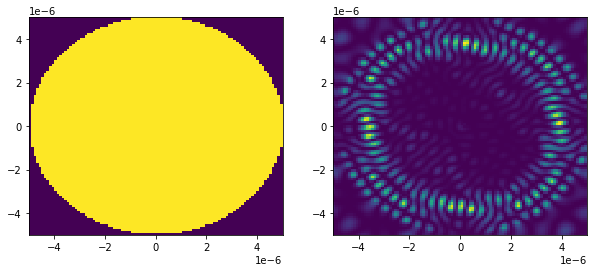

In [27]:
cir3 = Circle(x0=0, y0=0, eps_back=1.0, eps_circ=4.0, radius=5.0e-6)
cir3.make(Nx,Ny)
Δx = Δy = np.unique(np.diff(cir3.X))[0]
Ce = maxwell.Ce(Nx, Ny, 1, Δx, Δy, Δz=1)
Ch = maxwell.Ch(Nx, Ny, 1, Δx, Δy, Δz=1)
ϵ = np.hstack((np.ravel(cir3.eps), np.ravel(cir3.eps), np.ravel(cir3.eps)))
Tϵ = spdiags(ϵ, 0, ϵ.shape[0], ϵ.shape[0], format = 'csr')
μ = np.hstack((np.ravel(cir3.mu), np.ravel(cir3.mu), np.ravel(cir3.mu)))
Tμ = spdiags(μ, 0, μ.shape[0], μ.shape[0], format = 'csr')
solvedE = maxwell.solveE(Ce, Ch, ω, Tϵ, Tμ, j, m)

fig, axs = plt.subplots(1,2, figsize=(10,4))
axs[0].pcolormesh(cir3.X, cir3.Y, cir2.eps)
axs[1].pcolormesh(cir3.X, cir3.Y, np.reshape(np.abs(solvedE[-10001:-1])**2, (Nx, Ny)))

# modal eigensolver

In [107]:
from scipy.sparse.linalg import eigs

This is an eigensolver for the spatial modal eigenvalue distributions, not temporal ($\omega^2$) as was done above.  I am using Wonseok's notes, L10.

In [69]:
from scipy.sparse import block_diag, hstack, identity, csr_matrix
from scipy.sparse.linalg import inv

## Forward differences
def Dx_f(Nx, Ny, Δx, Nz=1):
    A = -1*identity(Nx, format='csr')
    B = -1*hstack((A[:, -1:], A[:, :-1]), format='csc') # shift left by 1
    return (1 / Δx) * block_diag([A+B] * (Ny*Nz), format='csc')

def Dy_f(Nx, Ny, Δy, Nz=1):
    A = block_diag([-1 * identity(Nx)] * Ny, format='csc')
    B = -1*hstack((A[:, -Nx:], A[:, :-Nx]), format='csc') # shift left by Nx
    return (1 / Δy) * block_diag(([A+B] * (Nz)))

## Backward differences
def Dx_b(Nx, Ny, Δx, Nz=1):
    return -1 * Dx_f(Nx, Ny, Δx, Nz).transpose()

def Dy_b(Nx, Ny, Δy, Nz=1):
    return -1 * Dy_f(Nx, Ny, Δy, Nz).transpose()

In [70]:
def Oh(tex, tey, tez, Nx, Ny, Δx, Δy):
    T = bmat([
                [tex, None],
                [None, tey]
            ])
    Fd1 = bmat([
                [-1*Dy_f(Nx, Ny, Δy)],
                [Dx_f(Nx, Ny, Δx)]
            ])
    Bd = bmat([
                [-1*Dy_b(Nx, Ny, Δy), Dx_b(Nx, Ny, Δx)]
            ])
    Bd2 = bmat([
                [Dx_b(Nx, Ny, Δx)],
                [Dy_b(Nx, Ny, Δy)]
            ])
    Fd2 = bmat([
                [Dx_f(Nx, Ny, Δx), Dy_f(Nx, Ny, Δy)]
            ])
    
    return csr_matrix((ω**2 * sc.mu_0 * T) + (T @ Fd1 @ inv(tez) @ Bd) + (Bd2 @ Fd2))

In [71]:
def Oe(tex, tey, tez, Nx, Ny, Δx, Δy):
    T = bmat([
                [tex, None],
                [None, tey]
            ])
    Fd1 = bmat([
                [-1*Dy_f(Nx, Ny, Δy)],
                [Dx_f(Nx, Ny, Δx)]
            ])
    Bd = bmat([
                [-1*Dy_b(Nx, Ny, Δy), Dx_b(Nx, Ny, Δx)]
            ])
    Bd2 = bmat([
                [Dx_b(Nx, Ny, Δx)],
                [Dy_b(Nx, Ny, Δy)]
            ])
    Fd2 = bmat([
                [Dx_f(Nx, Ny, Δx), Dy_f(Nx, Ny, Δy)]
            ])
    
    return csr_matrix((ω**2 * sc.mu_0 * T) + (Fd1 @ Bd) + (Bd2 @ inv(tez) @ Fd2 @ T))

In [141]:
oper_h = Oh(Tϵx, Tϵy, Tϵz, Nx, Ny, Δx, Δy)
oper_e = Oe(Tϵx, Tϵy, Tϵz, Nx, Ny, Δx, Δy)

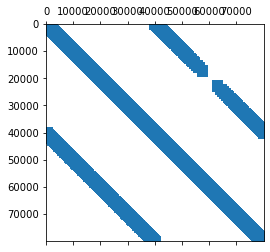

In [142]:
plt.spy(oper_h)

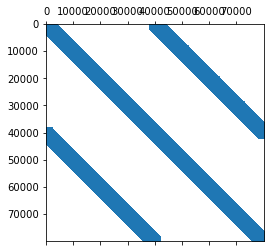

In [143]:
plt.spy(oper_e)

In [168]:
ndiel = np.sqrt(cir.eps_circ/sc.epsilon_0)
βest = 2*π*ndiel / λ

In [179]:
solved_modes_h = eigs(oper_h, 4, sigma=βest**2)

In [180]:
solved_modes_e = eigs(oper_e, 4, sigma=βest**2)

In [181]:
solved_modes_e

(array([4.54308507e+14+0.j, 4.54355985e+14+0.j, 4.20143440e+14+0.j,
        4.21334766e+14+0.j]),
 array([[-4.15926452e-05+0.j,  4.26177936e-05+0.j, -2.73883622e-06+0.j,
         -9.88212715e-07+0.j],
        [-4.18743467e-05+0.j,  4.27381883e-05+0.j, -7.01368380e-06+0.j,
         -1.19960203e-06+0.j],
        [-4.23747776e-05+0.j,  4.30799495e-05+0.j, -1.13087613e-05+0.j,
         -1.41970688e-06+0.j],
        ...,
        [-4.23754050e-05+0.j, -4.31928370e-05+0.j, -1.13050005e-06+0.j,
         -1.29871842e-05+0.j],
        [-4.18743698e-05+0.j, -4.28090217e-05+0.j, -1.25376380e-06+0.j,
         -8.37014935e-06+0.j],
        [-4.15924671e-05+0.j, -4.26510395e-05+0.j, -1.38627642e-06+0.j,
         -3.78466290e-06+0.j]]))

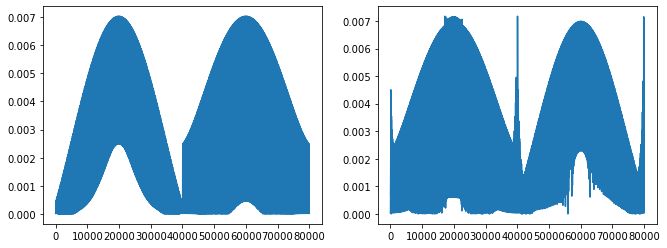

In [229]:
fig, axs = plt.subplots(1, 2, figsize=(11,4))

k = 1  # mode number
axs[0].plot(np.abs(solved_modes_h[1].T[k]))
axs[1].plot(np.abs(solved_modes_e[1].T[k]))

In [230]:
np.max(solved_modes_e[1])/np.max(solved_modes_h[1])

(1.0035879074216705+0j)

In [120]:
376/ndiel

68.64789387398082

Text(0.5, 1.0, 'Fundamental eigenmode, $|E|^2$')

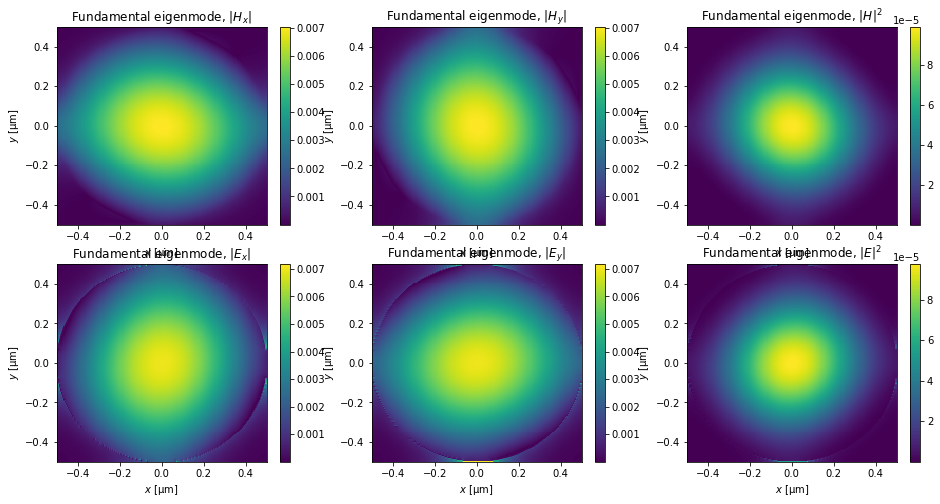

In [233]:
fig, axs = plt.subplots(2, 3, figsize=(16,8))

Z1 = np.reshape(np.abs(solved_modes_h[1].T[k][0:Nx*Ny]), (Nx, Ny))
im = axs[0,0].pcolormesh(cir.X*1e6, cir.Y*1e6, Z1)
fig.colorbar(im, ax=axs[0,0])
# axs[0,0].contour(cir.X*1e6, cir.Y*1e6, cir.eps)
axs[0,0].set_xlabel('$x$ [μm]')
axs[0,0].set_ylabel('$y$ [μm]')
axs[0,0].set_title('Fundamental eigenmode, $|H_x|$')

Z2 = np.reshape(np.abs(solved_modes_h[1].T[k][Nx*Ny-1:-1]), (Nx, Ny))
im = axs[0,1].pcolormesh(cir.X*1e6, cir.Y*1e6, Z2)
fig.colorbar(im, ax=axs[0,1])
# axs[0,1].contour(cir.X*1e6, cir.Y*1e6, cir.eps)
axs[0,1].set_xlabel('$x$ [μm]')
axs[0,1].set_ylabel('$y$ [μm]')
axs[0,1].set_title('Fundamental eigenmode, $|H_y|$')

im = axs[0,2].pcolormesh(cir.X*1e6, cir.Y*1e6, Z1**2 + Z2**2)
fig.colorbar(im, ax=axs[0,2])
# axs[0,2].contour(cir.X*1e6, cir.Y*1e6, cir.eps)
axs[0,2].set_xlabel('$x$ [μm]')
axs[0,2].set_ylabel('$y$ [μm]')
axs[0,2].set_title('Fundamental eigenmode, $|H|^2$')

Z1 = np.reshape(np.abs(solved_modes_e[1].T[k][0:Nx*Ny]), (Nx, Ny))
im = axs[1,0].pcolormesh(cir.X*1e6, cir.Y*1e6, Z1, vmin=Z1.min(), vmax=Z1.max())
fig.colorbar(im, ax=axs[1,0])
# axs[1,0].contour(cir.X*1e6, cir.Y*1e6, cir.eps)
axs[1,0].set_xlabel('$x$ [μm]')
axs[1,0].set_ylabel('$y$ [μm]')
axs[1,0].set_title('Fundamental eigenmode, $|E_x|$')

Z2 = np.reshape(np.abs(solved_modes_e[1].T[k][Nx*Ny-1:-1]), (Nx, Ny))
im = axs[1,1].pcolormesh(cir.X*1e6, cir.Y*1e6, Z2, vmin=Z2.min(), vmax=Z2.max())
fig.colorbar(im, ax=axs[1,1])
# axs[1,1].contour(cir.X*1e6, cir.Y*1e6, cir.eps)
axs[1,1].set_xlabel('$x$ [μm]')
axs[1,1].set_ylabel('$y$ [μm]')
axs[1,1].set_title('Fundamental eigenmode, $|E_y|$')

im = axs[1,2].pcolormesh(cir.X*1e6, cir.Y*1e6, Z1**2 + Z2**2)
fig.colorbar(im, ax=axs[1,2])
# axs[1,2].contour(cir.X*1e6, cir.Y*1e6, cir.eps)
axs[1,2].set_xlabel('$x$ [μm]')
axs[1,2].set_ylabel('$y$ [μm]')
axs[1,2].set_title('Fundamental eigenmode, $|E|^2$')

# waveguide object class

In [62]:
class Waveguide:
    def __init__(self, x0, y0, eps_clad_top, eps_clad_bot, 
                        eps_cor, wid, etch, thk, bot_thk):
        self.x0 = x0
        self.y0 = y0
        self.eps_clad_top = eps_clad_top*sc.epsilon_0
        self.eps_clad_bot = eps_clad_bot*sc.epsilon_0
        self.eps_cor = eps_cor*sc.epsilon_0
        self.wid = wid
        self.etch = etch
        self.thk = thk
        self.bot_thk = bot_thk
    def make(self, Nx, Ny):
        eps = np.full((Nx,Ny), self.eps_clad_top)
        self.mu = np.full((Nx,Ny), sc.mu_0)
        [self.X, self.Y] = np.meshgrid(np.linspace(-2*self.wid, 2*self.wid, Nx), \
                            np.linspace(-self.bot_thk, 2*self.thk, Ny))
        eps[self.Y < 0] = self.eps_clad_bot
        eps[(self.Y > 0) & (self.Y <= (self.thk - self.etch))] = self.eps_cor
        eps[(abs(self.X) <= self.wid) & (self.Y <= self.thk) & (self.Y >= 0)] = self.eps_cor
        self.eps = eps

In [63]:
wg = Waveguide(x0=0, y0=0, eps_clad_top=20, eps_clad_bot=5, 
                        eps_cor=30, wid=1e-6, etch=0.5e-6, thk=2e-6, bot_thk=3e-6)

In [64]:
Nx = Ny = 200
wg.make(Nx, Ny)

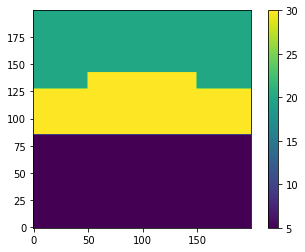

In [66]:
plt.imshow(wg.eps/sc.epsilon_0, origin="lower")
plt.colorbar()

## eigensolver with waveguide object

In [72]:
Δx = Δy = np.unique(np.diff(wg.X))[0]

In [74]:
ϵ = np.ravel(wg.eps)
Tϵx = spdiags(ϵ, 0, ϵ.shape[0], ϵ.shape[0], format = 'csr')
Tϵy = spdiags(ϵ, 0, ϵ.shape[0], ϵ.shape[0], format = 'csr')
Tϵz = spdiags(ϵ, 0, ϵ.shape[0], ϵ.shape[0], format = 'csr')

In [99]:
Tϵ = block_diag((Tϵx, Tϵy, Tϵz))

In [100]:
μ = np.hstack((np.ravel(wg.mu), np.ravel(wg.mu), np.ravel(wg.mu)))
Tμ = spdiags(μ, 0, μ.shape[0], μ.shape[0], format = 'csr')

In [101]:
oper_h = Oh(Tϵx, Tϵy, Tϵz, Nx, Ny, Δx, Δy)
oper_e = Oe(Tϵx, Tϵy, Tϵz, Nx, Ny, Δx, Δy)

C:\Users\heydarid\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\heydarid\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:215: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


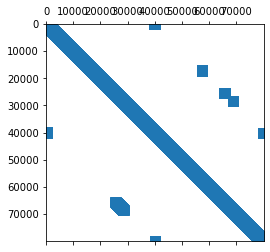

In [102]:
plt.spy(oper_h)

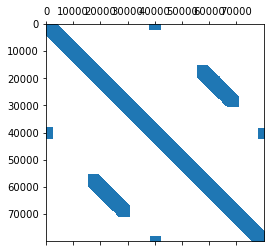

In [103]:
plt.spy(oper_e)

In [105]:
ndiel = np.sqrt(wg.eps_cor/sc.epsilon_0)
βest = 2*π*ndiel / λ

In [108]:
solved_modes_h = eigs(oper_h, 4, sigma=βest**2)

In [109]:
solved_modes_e = eigs(oper_e, 4, sigma=βest**2)

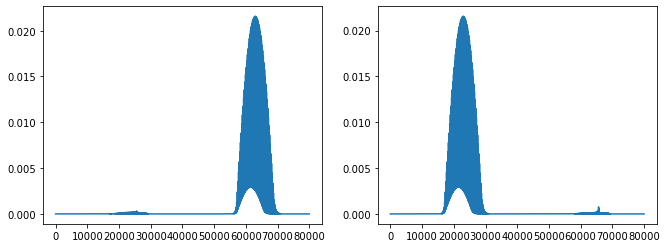

In [118]:
fig, axs = plt.subplots(1, 2, figsize=(11,4))

k = 0  # mode number
axs[0].plot(np.abs(solved_modes_h[1].T[k]))
axs[1].plot(np.abs(solved_modes_e[1].T[k]))

Text(0.5, 1.0, 'Fundamental eigenmode, $|E|^2$')

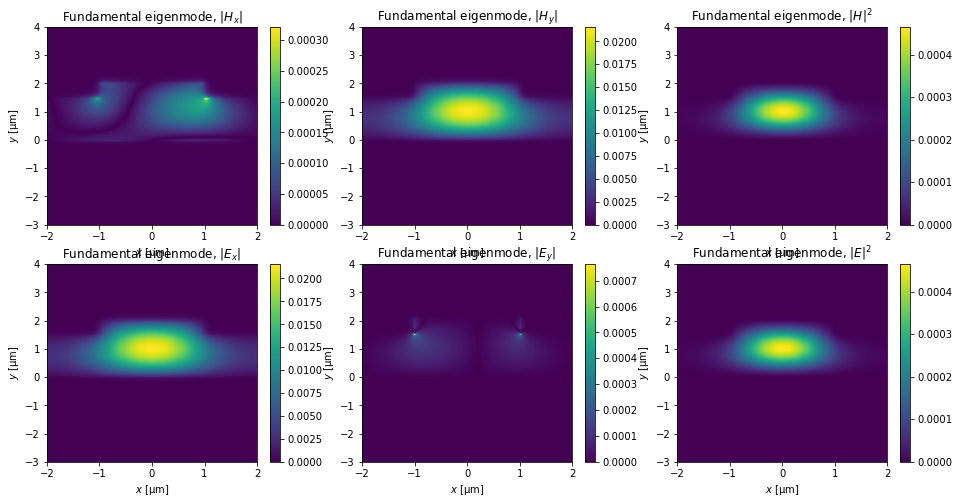

In [119]:
fig, axs = plt.subplots(2, 3, figsize=(16,8))

Z1 = np.reshape(np.abs(solved_modes_h[1].T[k][0:Nx*Ny]), (Nx, Ny))
im = axs[0,0].pcolormesh(wg.X*1e6, wg.Y*1e6, Z1)
fig.colorbar(im, ax=axs[0,0])
# axs[0,0].contour(wg.X*1e6, wg.Y*1e6, wg.eps)
axs[0,0].set_xlabel('$x$ [μm]')
axs[0,0].set_ylabel('$y$ [μm]')
axs[0,0].set_title('Fundamental eigenmode, $|H_x|$')

Z2 = np.reshape(np.abs(solved_modes_h[1].T[k][Nx*Ny-1:-1]), (Nx, Ny))
im = axs[0,1].pcolormesh(wg.X*1e6, wg.Y*1e6, Z2)
fig.colorbar(im, ax=axs[0,1])
# axs[0,1].contour(wg.X*1e6, wg.Y*1e6, wg.eps)
axs[0,1].set_xlabel('$x$ [μm]')
axs[0,1].set_ylabel('$y$ [μm]')
axs[0,1].set_title('Fundamental eigenmode, $|H_y|$')

im = axs[0,2].pcolormesh(wg.X*1e6, wg.Y*1e6, Z1**2 + Z2**2)
fig.colorbar(im, ax=axs[0,2])
# axs[0,2].contour(wg.X*1e6, wg.Y*1e6, wg.eps)
axs[0,2].set_xlabel('$x$ [μm]')
axs[0,2].set_ylabel('$y$ [μm]')
axs[0,2].set_title('Fundamental eigenmode, $|H|^2$')

Z1 = np.reshape(np.abs(solved_modes_e[1].T[k][0:Nx*Ny]), (Nx, Ny))
im = axs[1,0].pcolormesh(wg.X*1e6, wg.Y*1e6, Z1, vmin=Z1.min(), vmax=Z1.max())
fig.colorbar(im, ax=axs[1,0])
# axs[1,0].contour(wg.X*1e6, wg.Y*1e6, wg.eps)
axs[1,0].set_xlabel('$x$ [μm]')
axs[1,0].set_ylabel('$y$ [μm]')
axs[1,0].set_title('Fundamental eigenmode, $|E_x|$')

Z2 = np.reshape(np.abs(solved_modes_e[1].T[k][Nx*Ny-1:-1]), (Nx, Ny))
im = axs[1,1].pcolormesh(wg.X*1e6, wg.Y*1e6, Z2, vmin=Z2.min(), vmax=Z2.max())
fig.colorbar(im, ax=axs[1,1])
# axs[1,1].contour(wg.X*1e6, wg.Y*1e6, wg.eps)
axs[1,1].set_xlabel('$x$ [μm]')
axs[1,1].set_ylabel('$y$ [μm]')
axs[1,1].set_title('Fundamental eigenmode, $|E_y|$')

im = axs[1,2].pcolormesh(wg.X*1e6, wg.Y*1e6, Z1**2 + Z2**2)
fig.colorbar(im, ax=axs[1,2])
# axs[1,2].contour(wg.X*1e6, wg.Y*1e6, wg.eps)
axs[1,2].set_xlabel('$x$ [μm]')
axs[1,2].set_ylabel('$y$ [μm]')
axs[1,2].set_title('Fundamental eigenmode, $|E|^2$')